In [71]:
import h2o
h2o.init(max_mem_size = "10G")

train = h2o.import_file("temp_data/full_features_train_13_nov_2.csv")
test = h2o.import_file("temp_data/full_features_test_13_nov.csv")


x = train.columns
y = "log_revenue"

x.remove("revenue")
x.remove("log_revenue")

new_x = []
for val in x:
    if "mean_revenue" in val:
        continue
    else:
        new_x.append(val)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 hours 31 mins
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_oskarjor_nrlaxc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.177 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [72]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(seed=0, sort_metric="RMSLE")
aml.train(x=new_x, y=y, training_frame=train)

AutoML progress: |
12:22:41.149: _train param, Dropping bad and constant columns: [store_id, chain_count, country, address, year, store_name, is_grocery, plaace_cat_0, point]

███
12:23:32.266: _train param, Dropping bad and constant columns: [store_id, chain_count, country, address, year, store_name, is_grocery, plaace_cat_0, point]


12:23:38.885: _train param, Dropping bad and constant columns: [store_id, chain_count, country, address, year, store_name, is_grocery, plaace_cat_0, point]

█
12:23:55.721: _train param, Dropping unused columns: [store_id, chain_count, country, address, year, store_name, is_grocery, plaace_cat_0, point]
12:23:55.913: _train param, Dropping bad and constant columns: [store_id, chain_count, country, address, year, store_name, is_grocery, plaace_cat_0, point]

██
12:24:34.496: _train param, Dropping bad and constant columns: [store_id, chain_count, country, address, year, store_name, is_grocery, plaace_cat_0, point]

██████████████
12:28:21.919: _train para

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.6020247,0.0125060,0.5893542,0.6140956,0.6159726,0.5995762,0.5911247
mean_residual_deviance,0.6005162,0.0227640,0.5896032,0.618136,0.6311497,0.5798857,0.5838064
mse,0.6005162,0.0227640,0.5896032,0.618136,0.6311497,0.5798857,0.5838064
null_deviance,911.4642,61.97197,920.4353,971.28186,940.6912,917.4366,807.4759
r2,0.2946455,0.0183535,0.2926631,0.3034635,0.2881207,0.3192196,0.2697606
residual_deviance,642.1988,35.5753,650.92194,676.2408,669.6498,624.53687,589.6445
rmse,0.7748192,0.0146335,0.7678562,0.7862163,0.7944493,0.7615023,0.7640722
rmsle,0.3354712,0.0076957,0.3308991,0.3431453,0.3444815,0.3282844,0.3305456


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

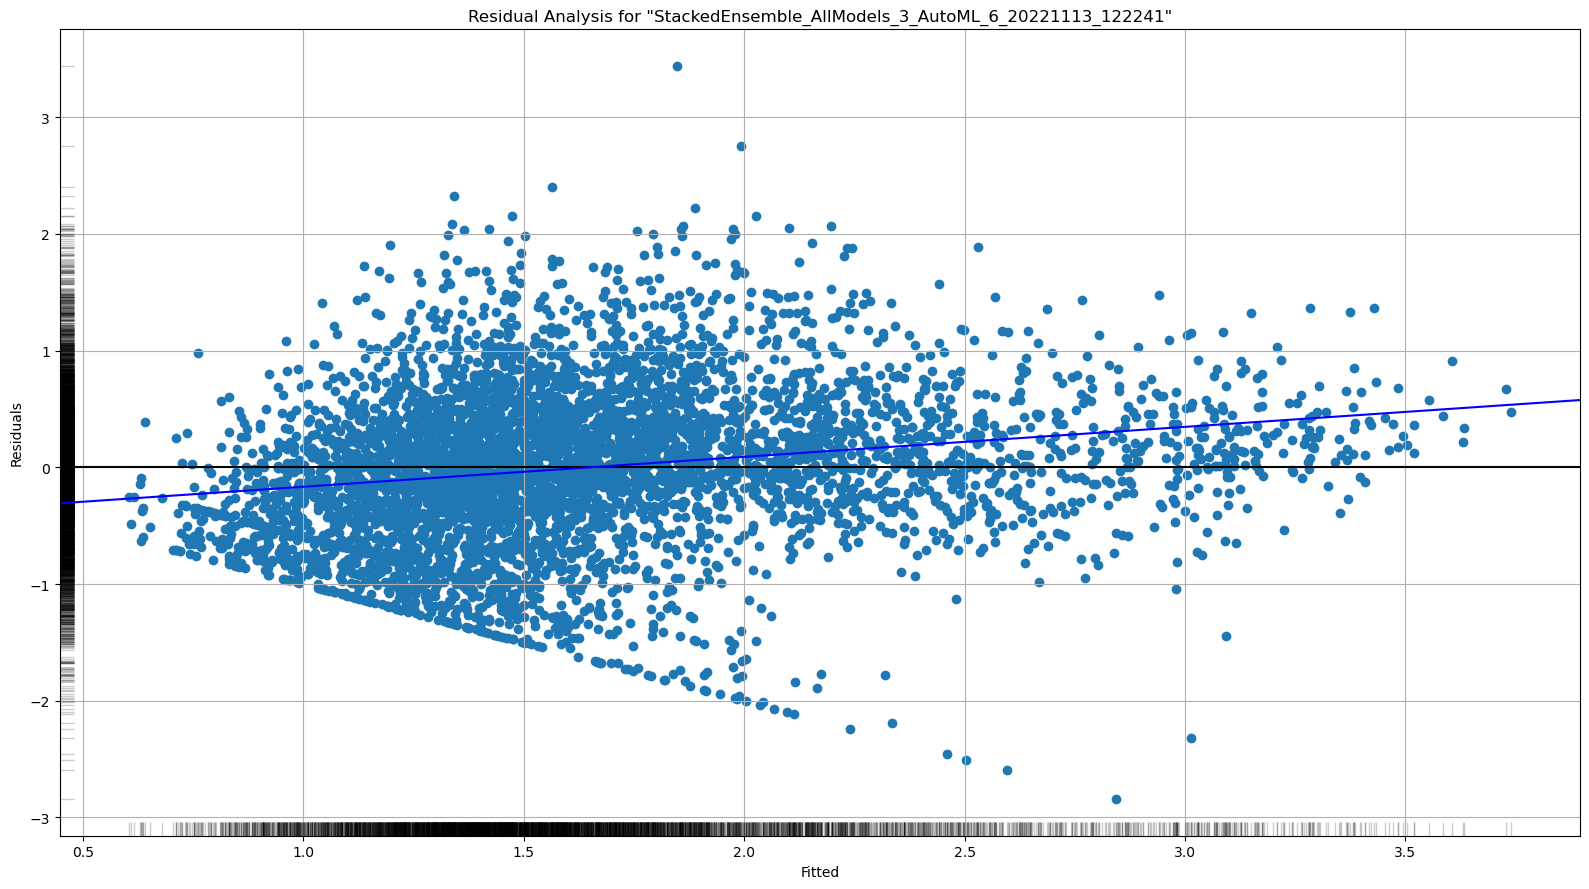

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_8ed84b208f352491f1e06f15ca074918> was cancelled by the user.

<Figure size 1600x900 with 0 Axes>

In [76]:
aml.leader.explain(train)

In [78]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/oskarjor/.local/lib/python3.9/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'plaace_hierarchy_id' has levels not trained on: ["1.5.1.0", "2.5.2.0", "2.6.1.0", "2.6.2.0", "2.6.3.1", "2.6.3.2", "2.6.3.3", "2.6.4.0", "2.6.5.0", "2.6.6.1", ...26 not listed..., "3.2.4.0", "3.3.2.0", "3.3.3.0", "3.3.4.0", "3.3.5.0", "3.3.6.0", "3.3.7.0", "3.4.2.0", "3.4.3.0", "3.6.1.0"]
  warnings.warn(w)
/Users/oskarjor/.local/lib/python3.9/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'sales_channel_name' has levels not trained on: ["Beer and soda shop", "Bookstores", "Bowling alleys", "Butchers", "Coffee and tea shops", "Construction workers", "Delicatessens", "Erotica shops", "Fish shops", "Flower shops", ...26 not listed..., "Photographers", "Skincare salons", "Spas", "Sporting goods stores", "Sports apparel stores", "Thrift shops - home furnishings and decor", "Toy stores", "Travel accessories stores", "Watchmakers", "Yarn and sewing shops"]


In [80]:
import numpy as np

preds_df = h2o.as_list(preds)
list_preds = preds_df["predict"].tolist()

#val_df = h2o.as_list(val["revenue"])
#y_true = np.array(val_df["revenue"].tolist())

In [93]:
mean_y = train["revenue"].mean()[0]
std_y = np.array(h2o.as_list(train)["revenue"].tolist()).std()

9.993870443514677

In [84]:
from pred_var_utils import reverse_log1p_transform_pred_var

list_preds = reverse_log1p_transform_pred_var(list_preds, std_y=)

0.5454505236220251

In [51]:
from RMSLE import rmsle
list_preds = np.array([max(0, xi) for xi in list_preds])
rmsle(y_true, list_preds)

0.9479508231534546